# This notebook shows the results of the literature extraction
## First let us check the .csv files and extract some data from them

In [1]:
#First we must say if we are viewing this live (on jupyter notebook) or if we must render it (to view on GitHub)
#Change to False if you are running and viewing locally
renderGraph = True

In [2]:
import LitExtractTools as LET
import plotly.graph_objects as go
import pandas as pd

In [3]:
LET.checkAllContent()
papers = LET.loadAllExtracted()
papers[0].index

Passed, there are no missing values where there shouldn't be


Index(['Title', 'Authors', 'Year', 'Journal', 'Aim', 'Main methods',
       'Benchmark methods', 'Method overview', 'Method complexity',
       'Volatility definition', 'Data summary', 'System in', 'System out',
       'Results summary', 'Performance metric', 'Evaluation method',
       'Open source?', 'Code language?', 'Interesting notes',
       'Subjective quality (bad, okay, good)', 'Insights/my takeaway', 'VD',
       'MT', 'NT', 'HT', 'PT', 'EA', 'pEA', 'IN', 'IS', 'IW', 'OW', 'SFP',
       'EM', 'ref', 'PO', 'path'],
      dtype='object', name='Field')

In [4]:
titles = LET.retrieveAll(papers,'Title')
authors = LET.retrieveAll(papers,'Authors')
years = LET.retrieveAll(papers,'Year')
volatilityDefinitions = LET.retrieveAll(papers,'VD')
methodType = LET.retrieveAll(papers,'MT')
networkType = LET.retrieveAll(papers,'NT')
hybridType = LET.retrieveAll(papers,'HT')
preprocessingType = LET.retrieveAll(papers,'PT')
evolutionaryAlgorithm = LET.retrieveAll(papers,'EA')
evolutionaryAlgorithm_purpose = LET.retrieveAll(papers,'pEA')
inputData = LET.retrieveAll(papers,'IN')
predictedOutput = LET.retrieveAll(papers,'PO')
inputStructure = LET.retrieveAll(papers,'IS')
inputWindow = LET.retrieveAll(papers,'IW')
outputWindow = LET.retrieveAll(papers,'OW')
strictlyFuturePrediction = LET.retrieveAll(papers,'SFP')
errorMetrics = LET.retrieveAll(papers,'EM')
ref = LET.retrieveAll(papers,'ref')

paths = LET.retrieveAll(papers,'path')

## Let's take a look at the volatility definitions used

In [5]:
for m in zip(paths,volatilityDefinitions):
    print(m)

('3. Data extraction/31.csv', 'Realised volatility')
('3. Data extraction/3.csv', 'Realised volatility (intraday)')
('3. Data extraction/28.csv', 'Historical volatility, other (range based), other (GARCH as filter)')
('3. Data extraction/9.csv', 'Implied volatility')
('3. Data extraction/10.csv', 'Realised volatility')
('3. Data extraction/13.csv', 'Historical volatility')
('3. Data extraction/7.csv', 'Historical volatility')
('3. Data extraction/1.csv', 'Historical volatility')
('3. Data extraction/11.csv', 'Realised volatility, other (jump based)')
('3. Data extraction/14.csv', 'Historical volatility, other (range based)')
('3. Data extraction/30.csv', 'Realised volatility')
('3. Data extraction/4.csv', 'Historical volatility (unsure)')
('3. Data extraction/26.csv', 'Realised volatility (intraday)')
('3. Data extraction/21.csv', 'Historical volatility (unsure)')
('3. Data extraction/8.csv', 'Other (range based)')
('3. Data extraction/12.csv', 'Implied volatility')
('3. Data extractio

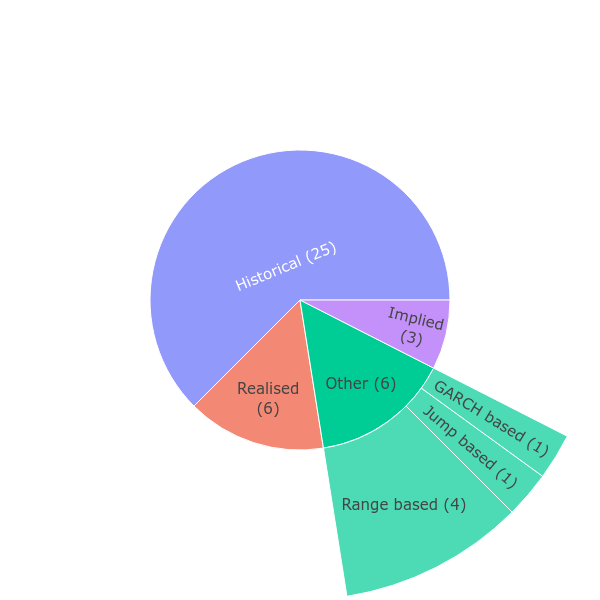

In [6]:
historicalCount = LET.inCounter('Historical',volatilityDefinitions)
realisedCount = LET.inCounter('Realised',volatilityDefinitions)
impliedCount = LET.inCounter('Implied',volatilityDefinitions)
othersCount = LET.inCounter('other',volatilityDefinitions)

jump_Other = LET.inCounter('jump',volatilityDefinitions)
range_Other = LET.inCounter('range',volatilityDefinitions)
garch_Other = LET.inCounter('GARCH',volatilityDefinitions)

historical_label = 'Historical (' + str(historicalCount) + ')' 
realised_label = 'Realised<br>(' + str(realisedCount) + ')' 
implied_label = 'Implied<br>(' + str(impliedCount) + ')' 
other_label = 'Other (' + str(sum([jump_Other,range_Other,garch_Other])) + ')'
jumpbased_label = 'Jump based (' + str(jump_Other) + ')'
rangebased_label = 'Range based (' + str(range_Other) + ')'
garchbased_label = 'GARCH based (' + str(garch_Other) + ')'

fig =go.Figure(go.Sunburst(
    labels= [historical_label,realised_label,implied_label,other_label,jumpbased_label,rangebased_label,garchbased_label],
    parents=['','','','',other_label,other_label,other_label],
    values=[historicalCount,realisedCount,impliedCount,sum([jump_Other,range_Other,garch_Other]),jump_Other,range_Other,garch_Other],
    branchvalues="total",
))


fig.update_layout(margin = dict(t=0, l=0, r=0, b=0), uniformtext=dict(minsize=15, mode='hide'), width = 600, height = 600)
fig.show(renderer="png", width=600, height=600) if renderGraph else fig.show()

## Taking a look at the method, network, hybrid, preprocessing types, and evolutionary algorithms used

In [7]:
for m in zip(paths,methodType,networkType,hybridType,preprocessingType,evolutionaryAlgorithm,evolutionaryAlgorithm_purpose):
    print(m)

('3. Data extraction/31.csv', 'Pure', 'RNN (LSTM)', 'na', 'na', 'na', 'na')
('3. Data extraction/3.csv', 'Hybrid', 'MLP', 'ARMA', 'Wavelet transform', 'na', 'na')
('3. Data extraction/28.csv', 'Pure', 'MLP', 'na', 'na', 'na', 'na')
('3. Data extraction/9.csv', 'Hybrid', 'MLP', 'Chaos theory', 'na', 'na', 'na')
('3. Data extraction/10.csv', 'Pure', 'RNN', 'na', 'Cholesky decomposition', 'na', 'na')
('3. Data extraction/13.csv', 'Pure', 'MLP', 'na', 'na', 'na', 'na')
('3. Data extraction/7.csv', 'Hybrid', 'MLP (FLNN)', 'Fuzzy, GARCH', 'na', 'Differential evolution', 'Parameter optimisation')
('3. Data extraction/1.csv', 'Hybrid', 'MLP (FLNN)', 'GARCH, Fuzzy', 'na', 'Differential harmony search', 'Parameter optimisation')
('3. Data extraction/11.csv', 'Hybrid', 'MLP', 'HAR', 'na', 'na', 'na')
('3. Data extraction/14.csv', 'Pure', 'MLP', 'na', 'na', 'na', 'na')
('3. Data extraction/30.csv', 'Hybrid', 'MLP', 'GARCH', 'na', 'na', 'na')
('3. Data extraction/4.csv', 'Pure', 'RNN', 'na', 'na', 

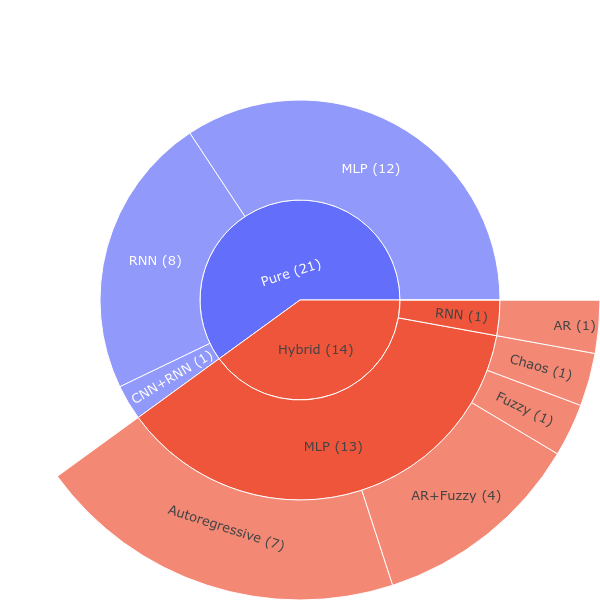

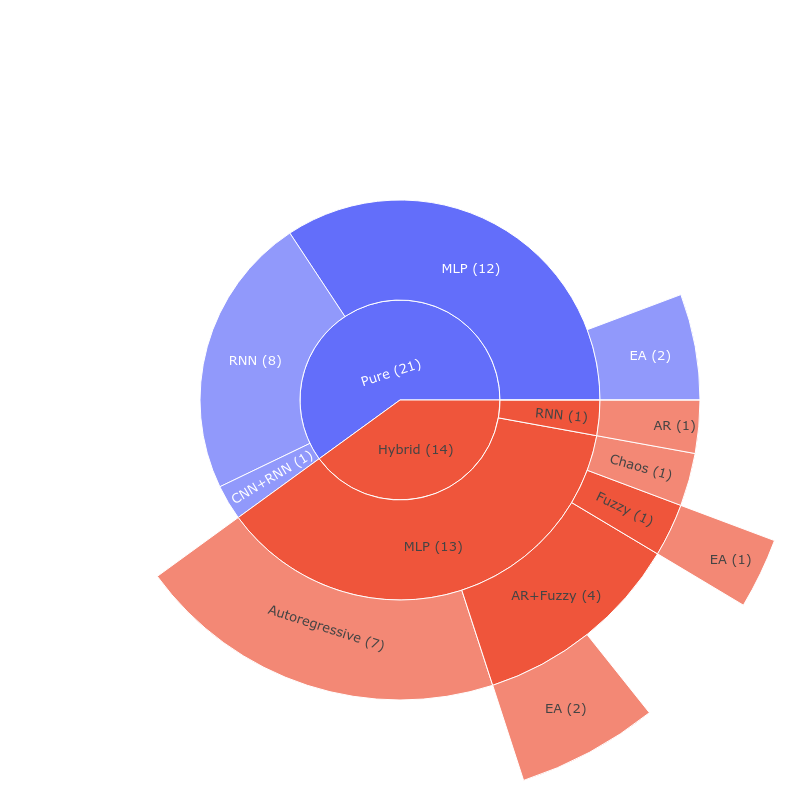

In [8]:
#Pure vs Hybrid in centre
#MLP, CNN, RNN in middle ring
#Hybrid type in outer ring
pureCount = LET.equalCounter('Pure', methodType)
hybridCount = LET.equalCounter('Hybrid', methodType)

pureNetworks = [networkType[i] if (x == 'Pure') else ('') for i,x in enumerate(methodType)]
Pure_MLPCount = LET.inCounter('MLP',pureNetworks)
Pure_CNNCount = LET.inCounter('CNN',pureNetworks)
Pure_RNNCount = LET.inCounter('RNN',pureNetworks)
    
#I know that the one instance of CNN is actually a CNN/LSTM combination, so a bit of hacking here. I also name it correspondingly in the sunburst charts
Pure_RNNCount -= 1


hybridNetworks = [networkType[i] if (x == 'Hybrid') else ('') for i,x in enumerate(methodType)]
Hybrid_MLPCount = LET.inCounter('MLP',hybridNetworks)
Hybrid_CNNCount = LET.inCounter('CNN',hybridNetworks)
Hybrid_RNNCount = LET.inCounter('RNN',hybridNetworks)

#I also know that two of the pure MLP methods utilise EA, so a bit more of a hack here again
Pure_MLP_EACount = 2
    
MLP_hybrids = [hybridType[i] if (x == 'Hybrid' and 'MLP' in networkType[i]) else '' for i,x in enumerate(methodType)]
RNN_hybrids = [hybridType[i] if (x == 'Hybrid' and 'RNN' in networkType[i]) else '' for i,x in enumerate(methodType)]

MLP_AR_FuzzyCount = 0
MLP_FuzzyCount = 0
MLP_ARCount = 0
MLP_AR_Fuzzy_EACount = 0
MLP_Fuzzy_EACount = 0
for i,line in enumerate(MLP_hybrids):
    if any([x in line for x in ['GARCH','EWMA','LSTAR','ARMA','HAR']]) and 'Fuzzy' in line:
        MLP_AR_FuzzyCount += 1
    elif any([x in line for x in ['GARCH','EWMA','LSTAR','ARMA','HAR']]):
        MLP_ARCount += 1
    elif 'Fuzzy' in line:
        MLP_FuzzyCount += 1

    if evolutionaryAlgorithm[i] != 'na':
        if any([x in line for x in ['GARCH','EWMA','LSTAR','ARMA','HAR']]) and 'Fuzzy' in line:
            MLP_AR_Fuzzy_EACount += 1
        elif 'Fuzzy' in line:
            MLP_Fuzzy_EACount += 1
        
RNN_ARCount = 0
for line in RNN_hybrids:
    RNN_ARCount += 1 if any([x in line for x in ['GARCH','EWMA','LSTAR','ARMA','HAR']]) else 0

MLP_ChaosCount = LET.inCounter('Chaos',MLP_hybrids)
RNN_ChaosCount = LET.inCounter('Chaos',RNN_hybrids)
RNN_FuzzyCount = LET.inCounter('Fuzzy',RNN_hybrids)
        
    
######  Plotting the sunburst chart ######    
    
ids=['Pure','Hybrid','Pure-RNN','Pure-MLP','Pure-CNN+RNN','Hybrid-MLP','Hybrid-RNN','Hybrid-CNN','MLP-Autoregressive','MLP-Fuzzy','MLP-Chaos','MLP-AR+Fuzzy','RNN-AR','RNN-Fuzzy']
parents=['','','Pure','Pure','Pure','Hybrid','Hybrid','Hybrid','Hybrid-MLP','Hybrid-MLP','Hybrid-MLP','Hybrid-MLP','Hybrid-RNN','Hybrid-RNN']
values=[pureCount,hybridCount,Pure_RNNCount,Pure_MLPCount,Pure_CNNCount,Hybrid_MLPCount,Hybrid_RNNCount,Hybrid_CNNCount,MLP_ARCount,MLP_FuzzyCount,MLP_ChaosCount,MLP_AR_FuzzyCount,RNN_ARCount,RNN_FuzzyCount]

labels = []
for i,val in zip(ids,values):
    label = i if '-' not in i else i[i.find('-')+1:]
    label += ' (' + str(val) + ')'
    labels.append(label)
    
fig =go.Figure(go.Sunburst(
    ids=ids,
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
))

fig.update_layout(margin = dict(t=0, l=0, r=0, b=0), uniformtext=dict(minsize=13, mode='hide'), width = 600, height = 600)
fig.show(renderer="png", width=600, height=600) if renderGraph else fig.show()


######  Plotting the sunburst chart, with evolutionary algorithms ######

ids_EA=['Pure','Hybrid','Pure-RNN','Pure-MLP','Pure-CNN+RNN','Hybrid-MLP','Hybrid-RNN','Hybrid-CNN','MLP-Autoregressive','MLP-Fuzzy','MLP-Chaos','MLP-AR+Fuzzy','RNN-AR','RNN-Fuzzy','MLP-AR-Fuzzy-EA','MLP-Fuzzy-EA','Pure-MLP-EA']
parents_EA=['','','Pure','Pure','Pure','Hybrid','Hybrid','Hybrid','Hybrid-MLP','Hybrid-MLP','Hybrid-MLP','Hybrid-MLP','Hybrid-RNN','Hybrid-RNN','MLP-AR+Fuzzy','MLP-Fuzzy','Pure-MLP']
values_EA=[pureCount,hybridCount,Pure_RNNCount,Pure_MLPCount,Pure_CNNCount,Hybrid_MLPCount,Hybrid_RNNCount,Hybrid_CNNCount,MLP_ARCount,MLP_FuzzyCount,MLP_ChaosCount,MLP_AR_FuzzyCount,RNN_ARCount,RNN_FuzzyCount,MLP_AR_Fuzzy_EACount,MLP_Fuzzy_EACount,Pure_MLP_EACount]

labels_EA = []
for i,val in zip(ids_EA,values_EA):
    label = i if '-' not in i else i[i.rfind('-')+1:]
    label += ' (' + str(val) + ')'
    labels_EA.append(label)
    
fig2 =go.Figure(go.Sunburst(
    ids=ids_EA,
    labels=labels_EA,
    parents=parents_EA,
    values=values_EA,
    branchvalues="total",
))

fig2.update_layout(margin = dict(t=0, l=0, r=0, b=0), uniformtext=dict(minsize=13, mode='hide'), width = 800, height = 800)
fig2.show(renderer="png", width=800, height=800) if renderGraph else fig2.show()

## We can also take a look at the error metrics used to quantify performance (not shown in appendix table)

In [9]:
for m in zip(paths,errorMetrics):
    print(m)

('3. Data extraction/31.csv', 'RMSE')
('3. Data extraction/3.csv', 'RMSFE, DMariano statistic, SPA, bootstrapped p-values over 1000 replications, interval forecast evaluation of Christoffersen, QLIKE')
('3. Data extraction/28.csv', 'MASE (normalised at each forecasting horizon by the naive method)')
('3. Data extraction/9.csv', 'General adjusted R2, standard error, BIC, MCS, MSE, QLIKE')
('3. Data extraction/10.csv', 'MSE (univariate comparison), Frobenius distance (multivariate comparison), Euclidean distance (multivariate comparison), MAE, RMSE, Diebold Mariano test')
('3. Data extraction/13.csv', 'MAE, MSE, RMSE')
('3. Data extraction/7.csv', 'MSFE, RMSFE, MAFE, Wilcoxon rank sum test, SPA')
('3. Data extraction/1.csv', 'MSFE, RMSFE, MAFE, rel MAE, SPA, residual analysis')
('3. Data extraction/11.csv', 'MCS, SPA, RMSE, MAE, MME, M-Z R2')
('3. Data extraction/14.csv', 'ME, RMSE, MAE, MPE, MAPE, MASE, ACF1')
('3. Data extraction/30.csv', 'MSE')
('3. Data extraction/4.csv', 'NLL')
('3.

## Now lets take a look at assets which had its volatility predicted (i.e. the outputs)

In [10]:
for m in zip(paths,predictedOutput):
    print(m)

('3. Data extraction/31.csv', 'S&P500, AAPL')
('3. Data extraction/3.csv', 'CSI300')
('3. Data extraction/28.csv', 'CAC40 (all constituents)')
('3. Data extraction/9.csv', 'VIX, VSTOXX, JNIV, VFTSE, VDAX, VCAC, VAEX, VSMI')
('3. Data extraction/10.csv', 'S&P500, 10y treasury note futures, 1m treasury bond futures')
('3. Data extraction/13.csv', 'Crude oil (futures), S&P500')
('3. Data extraction/7.csv', 'SENSEX, S&P500, NIFTY')
('3. Data extraction/1.csv', 'SENSEX, NIFTY')
('3. Data extraction/11.csv', 'Crude oil, heating oil, natural gas')
('3. Data extraction/14.csv', 'S&P500')
('3. Data extraction/30.csv', 'S&P500 (5 randomly selected: Allstate corp., Walt Disney, WW Grainger, HP company, Brown-Forman corp.)')
('3. Data extraction/4.csv', 'China A shares (all 162 constituents)')
('3. Data extraction/26.csv', 'STI (all constituents)')
('3. Data extraction/21.csv', 'Brent crude oil')
('3. Data extraction/8.csv', 'CSI300, HSI')
('3. Data extraction/12.csv', 'FTSE100')
('3. Data extract

After splitting by commas and removing brackets:
['S&P500', 'AAPL', 'CSI300', 'CAC40 ', 'VIX', 'VSTOXX', 'JNIV', 'VFTSE', 'VDAX', 'VCAC', 'VAEX', 'VSMI', 'S&P500', '10y treasury note futures', '1m treasury bond futures', 'Crude oil ', 'S&P500', 'SENSEX', 'S&P500', 'NIFTY', 'SENSEX', 'NIFTY', 'Crude oil', 'heating oil', 'natural gas', 'S&P500', 'S&P500 ', 'China A shares ', 'STI ', 'Brent crude oil', 'CSI300', 'HSI', 'FTSE100', 'S&P500', 'NASDAQ', 'DJIA', 'NYSE', 'Gold', 'silver', 'copper', 'Gold ', 'KOSPI200', 'S&P500', 'BUX', 'DJIA ', 'S&P500', 'NIFTY', 'RIL', '600827.SH', '600115.SH', '600018.SH', 'KOSPI200', 'VIX', 'Gold ', 'RUL9 ', 'S&P500', 'NASDAQ', 'DAX', 'KOSPI200', 'IPC', 'Oil ', 'S&P500', 'NASDAQ100', 'Nikkei225', 'SENSEX', 'Gold', 'crude oil', 'S&P500', 'NSE']


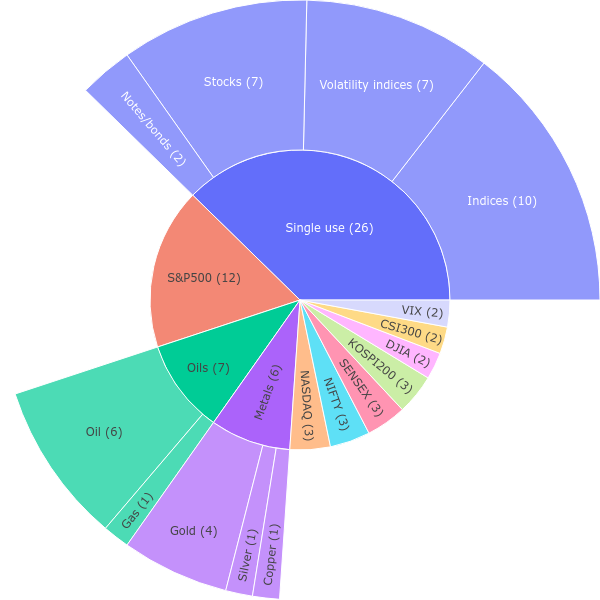

In [11]:
dataUsed = []
for row in predictedOutput:
    row = LET.removeBrackets(row)
    items = row.split(', ')
    for item in items:
        dataUsed.append(item)
print('After splitting by commas and removing brackets:')    
print(dataUsed)

exchangeCount = LET.inCounter_withRemoval('exchange',dataUsed)
SP500Count = LET.inCounter_withRemoval('S&P500',dataUsed)
NASDAQCount = LET.inCounter_withRemoval('NASDAQ',dataUsed)
NIFTYCount = LET.inCounter_withRemoval('NIFTY',dataUsed)
DJIACount = LET.inCounter_withRemoval('DJIA',dataUsed)
SENSEXCount = LET.inCounter_withRemoval('SENSEX',dataUsed)
KOSPI200Count = LET.inCounter_withRemoval('KOSPI200',dataUsed)
CSI300Count = LET.inCounter_withRemoval('CSI300',dataUsed)
VIXCount = LET.inCounter_withRemoval('VIX',dataUsed)
goldCount,silverCount,copperCount = LET.inCounter('Gold',dataUsed), LET.inCounter('Silver',dataUsed), LET.inCounter('Copper',dataUsed)
metalsCount = sum(LET.inCounter_withRemoval(x,dataUsed) for x in ['Gold','Copper','Silver'])
oilCount,gasCount = LET.inCounter('Oil',dataUsed), LET.inCounter('Gas',dataUsed)
oilsCount = sum(LET.inCounter_withRemoval(x,dataUsed) for x in ['Oil','Gas'])

#Now we have binned most of them, all that remains are things which were only used once
#We can further bin these into: stocks, indices, volatility indices, and notes & bonds

notes_bondsCount = LET.inCounter_withRemoval('note',dataUsed) + LET.inCounter_withRemoval('bond',dataUsed)
otherVol_indexCount = sum(LET.inCounter_withRemoval(x,dataUsed) for x in ['JNIV','VAEX','VCAC','VDAX','VFTSE','VSMI','VSTOXX'])
otherStocksCount = sum(LET.inCounter_withRemoval(x,dataUsed) for x in ['.SH','RUL9','RIL','AAPL','BUX'])
otherIndicesCount = len(dataUsed)

singleUse = sum([notes_bondsCount,otherVol_indexCount,otherStocksCount,otherIndicesCount])
ids = ['Single use','Metals','Oils','S&P500','NASDAQ','NIFTY','DJIA','SENSEX','KOSPI200','CSI300','VIX','Gold','Silver','Copper','Oil','Gas','Notes/bonds','Volatility indices','Stocks','Indices']
parents = ['','','','','','','','','','','','Metals','Metals','Metals','Oils','Oils','Single use','Single use','Single use','Single use']
values = [singleUse,metalsCount,oilsCount,SP500Count,NASDAQCount,NIFTYCount,DJIACount,SENSEXCount,KOSPI200Count,CSI300Count,VIXCount,goldCount,silverCount,copperCount,oilCount,gasCount,notes_bondsCount,otherVol_indexCount,otherStocksCount,otherIndicesCount]

labels = []
for i,val in zip(ids,values):
    label = i + ' (' + str(val) + ')'
    labels.append(label)

fig =go.Figure(go.Sunburst(
    ids=ids,
    labels = labels,
    parents = ['','','','','','','','','','','','Metals','Metals','Metals','Oils','Oils','Single use','Single use','Single use','Single use'],
    values = [singleUse,metalsCount,oilsCount,SP500Count,NASDAQCount,NIFTYCount,DJIACount,SENSEXCount,KOSPI200Count,CSI300Count,VIXCount,goldCount,silverCount,copperCount,oilCount,gasCount,notes_bondsCount,otherVol_indexCount,otherStocksCount,otherIndicesCount],
    branchvalues="total",
))

fig.update_layout(margin = dict(t=0, l=0, r=0, b=0), uniformtext=dict(minsize=11, mode='hide'), width = 600, height = 600)
fig.show(renderer="png", width=600, height=600) if renderGraph else fig.show()

## Now lets look at the inputs and its structure

In [12]:
for m in zip(paths,inputStructure):
    print(m)

('3. Data extraction/31.csv', 'Single asset, multivariate (volatility, log returns)')
('3. Data extraction/3.csv', 'Single asset, univariate (wavelet decomposed volatility)')
('3. Data extraction/28.csv', 'Single asset, univariate (primary volatility proxy), multivariate (primary volatility proxy, additional volatility proxies, volume)')
('3. Data extraction/9.csv', 'Single asset, univariate (volatility)')
('3. Data extraction/10.csv', 'Multi-asset, multivariate (Cholesky factors, dividend price, price earning ratio, equity market return, FF 3 factors, 1m t-bill rate, term spread difference between log and short term bond yields, inflation rate, industrial production growth, all lagged 1 period)')
('3. Data extraction/13.csv', 'Multi-asset, multivariate (S&P500 price, volatility of T value, weekly crude oil future prices, average of last 6 months returns crude oil future price, implied volatility of crude oil price)')
('3. Data extraction/7.csv', 'Single asset, multivariate (log return

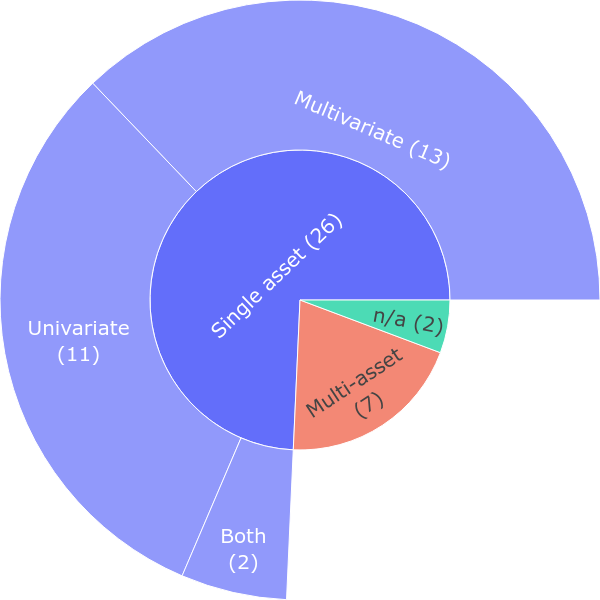

In [13]:
singleAssetCount = LET.inCounter('Single asset',inputStructure)
multiAssetCount = LET.inCounter('Multi-asset',inputStructure)
unsureAssetCount = LET.inCounter('unsure',inputStructure)

univariateCount = LET.inCounter('univariate',inputStructure)
multivariateCount = LET.inCounter('multivariate',inputStructure)

singleAssets = [x if 'Single asset' in x else '' for x in inputStructure]
singleAssetUnivariateCount = LET.inCounter('univariate',singleAssets) 
singleAssetMultivariateCount = LET.inCounter('multivariate',singleAssets)
singleAssetBothCount = singleAssetUnivariateCount + singleAssetMultivariateCount - singleAssetCount
singleAssetUnivariateCount -= singleAssetBothCount
singleAssetMultivariateCount -= singleAssetBothCount 


multiAssets = [x if 'Multi-asset' in x else '' for x in inputStructure]
multiAssetMultivariateCount = LET.inCounter('multivariate',multiAssets) #multi-asset input can't be univariate

singleAssetStr = 'Single asset (' + str(singleAssetCount) + ')'
multiAssetStr = 'Multi-asset<br>(' + str(multiAssetCount) + ')'
unsureStr = 'n/a (' + str(unsureAssetCount) + ')'
singleUniStr = 'Univariate<br>(' + str(singleAssetUnivariateCount) + ')'
singleMultiStr = 'Multivariate (' + str(singleAssetMultivariateCount) + ')'
singleBothStr = 'Both<br>(' + str(singleAssetBothCount) + ')'
multiMultiStr = 'Multivariate (' + str(multiAssetMultivariateCount) + ')'

fig =go.Figure(go.Sunburst(
    labels = [singleAssetStr, multiAssetStr, unsureStr, singleUniStr, singleMultiStr,singleBothStr],
    parents = ["", "", "", singleAssetStr, singleAssetStr, singleAssetStr],
    values = [singleAssetCount, multiAssetCount, unsureAssetCount, singleAssetUnivariateCount, singleAssetMultivariateCount,singleAssetBothCount],
    branchvalues="total",
))

fig.update_layout(margin = dict(t=0, l=0, r=0, b=0), uniformtext=dict(minsize=20, mode='hide'), width = 600, height = 600)
fig.show(renderer="png", width=600, height=600) if renderGraph else fig.show()

## Now we want a table that shows all of the above, with some more detail

The output of this code is meant to be copy pasted into overleaf, and is formatted with that in mind.

We also create a combined table, saved as a .csv file in this directory. 

In [14]:
csvtable = pd.DataFrame(columns=['Title','Author','Year','Neural network method','Hybrid method','Transformation','Evolutionary algorithm','Purpose of evolutionary algorithm','Volatility definition','Input data','Output data','Input structure','Input window','Output window','Error metric'])

In [15]:
table = []
columns=['Title','Author','Year','Neural network method','Hybrid method','Transformation','Evolutionary algorithm','Purpose of evolutionary algorithm']
for m in zip(paths,titles,authors,years,ref,networkType,hybridType,preprocessingType,evolutionaryAlgorithm, evolutionaryAlgorithm_purpose):

    _,title,author,year,name,network,hybrid,preprocessing,evolutionary,EApurpose = m
    
    csvtable.loc[name] = [title,author,year,network,LET.replace_na('-',hybrid),LET.replace_na('-',preprocessing),LET.replace_na('-',evolutionary),LET.replace_na('',EApurpose),'','','','','','','']
    EApurpose = ', initialisation' if 'pretraining' in EApurpose else EApurpose
    EApurpose = ', optimisation' if 'optimisation' in EApurpose else EApurpose 
    table.append(name + '\t&\t' + network + '\t&\t' + LET.replace_na('-',hybrid) + '\t&\t' + LET.replace_na('-',preprocessing) + '\t&\t' + LET.replace_na('-',evolutionary) + LET.replace_na('',EApurpose) + '\\\\')
        
for line in table:
    print(line)

Liu, 2019 \cite{liu_novel_2019}	&	RNN (LSTM)	&	-	&	-	&	-\\
Zhai, 2020 \cite{zhai_neural_2020}	&	MLP	&	ARMA	&	Wavelet transform	&	-\\
Stefani, 2017 \cite{stefani_machine_2017}	&	MLP	&	-	&	-	&	-\\
Litimi, 2019 \cite{litimi_chaotic_2018}	&	MLP	&	Chaos theory	&	-	&	-\\
Bucci, 2020 \cite{bucci_choleskyann_2020}	&	RNN	&	-	&	Cholesky decomposition	&	-\\
Khan, 2017 \cite{khan_determining_2017}	&	MLP	&	-	&	-	&	-\\
Dash, 2016 \cite{dash_evolutionary_2016}	&	MLP (FLNN)	&	Fuzzy, GARCH	&	-	&	Differential evolution, optimisation\\
Dash, 2015 \cite{dash_differential_2015}	&	MLP (FLNN)	&	GARCH, Fuzzy	&	-	&	Differential harmony search, optimisation\\
Barunik, 2016 \cite{barunik_combining_2016}	&	MLP	&	HAR	&	-	&	-\\
Kumar, 2015 \cite{kumar_p_estimation_2015}	&	MLP	&	-	&	-	&	-\\
Monfared, 2015 \cite{monfared_noise_2015}	&	MLP	&	GARCH	&	-	&	-\\
Luo, 2018 \cite{luo_neural_2018}	&	RNN	&	-	&	-	&	-\\
Das, 2016 \cite{das_ierspop_2016}	&	MLP	&	Fuzzy, GARCH	&	-	&	-\\
Bildirici, 2015 \cite{bildirici_forecasting_2

In [16]:
columns = ['Volatility definition','Input data','Output data','Input structure','Input window','Output window','Error metric']
table = []
for m in zip(paths,ref,inputData,predictedOutput,inputStructure,inputWindow,outputWindow,volatilityDefinitions,errorMetrics):
    #print(m)
    _,name,data,dataOut,inStruc,inWin,outWin,volatility,metric = m
    volatility = LET.find_replace('unsure','n/a',volatility)
    inWin = LET.find_replace('unsure','n/a',inWin)
    outWin = LET.find_replace('unsure','n/a',outWin)
    inStruc = LET.find_replace('unsure','n/a',inStruc)
    extra = '' if data == '' else ', '
    table.append(name + '\t&\t' + volatility + '\t&\t' + '\\textbf{' + LET.fixAmpersand(dataOut) + '}' + extra + LET.fixAmpersand(data) + '\t&\t' + LET.fixAmpersand(inStruc)  + '\t&\t' + LET.find_replace(' - ','--',inWin) + '\t&\t' + LET.find_replace(' - ','--',outWin) +  '\\\\')
    
    csvtable.loc[name][columns] = [volatility,dataOut+extra+LET.fixAmpersand(data),dataOut,LET.fixAmpersand(inStruc),LET.find_replace(' - ','--',inWin),LET.find_replace(' - ','--',outWin),metric]
    
for line in table:
    print(line)
    

Liu, 2019 \cite{liu_novel_2019}	&	Realised volatility	&	\textbf{S\&P500, AAPL}	&	Single asset, multivariate (volatility, log returns)	&	1, 2, 3, 4, 5	&	1--n/a, 3--n/a\\
Zhai, 2020 \cite{zhai_neural_2020}	&	Realised volatility (intraday)	&	\textbf{CSI300}	&	Single asset, univariate (wavelet decomposed volatility)	&	4	&	1--5, 1--20, 1--100, 100--200, 260--360, 400--500\\
Stefani, 2017 \cite{stefani_machine_2017}	&	Historical volatility, other (range based), other (GARCH as filter)	&	\textbf{CAC40 (all constituents)}	&	Single asset, univariate (primary volatility proxy), multivariate (primary volatility proxy, additional volatility proxies, volume)	&	2, 5	&	1--2, 1--5, 1--8, 1--10, 1--12\\
Litimi, 2019 \cite{litimi_chaotic_2018}	&	Implied volatility	&	\textbf{VIX, VSTOXX, JNIV, VFTSE, VDAX, VCAC, VAEX, VSMI}	&	Single asset, univariate (volatility)	&	2-48	&	1\\
Bucci, 2020 \cite{bucci_choleskyann_2020}	&	Realised volatility	&	\textbf{S\&P500, 10y treasury note futures, 1m treasury bond fut

In [17]:
csvtable.to_csv('Full results.csv',index=False)        
csvtable

,Title,Author,Year,Neural network method,Hybrid method,Transformation,Evolutionary algorithm,Purpose of evolutionary algorithm,Volatility definition,Input data,Output data,Input structure,Input window,Output window,Error metric
"Liu, 2019 \cite{liu_novel_2019}",Novel volatility forecasting using deep learni...,Yang Liu,2019,RNN (LSTM),-,-,-,,Realised volatility,"S&P500, AAPL","S&P500, AAPL","Single asset, multivariate (volatility, log re...","1, 2, 3, 4, 5","1--n/a, 3--n/a",RMSE
"Zhai, 2020 \cite{zhai_neural_2020}",A neural network enhanced volatiltiy component...,"Jia Zhai, Yi Cao, Xiaoquan Liu",2020,MLP,ARMA,Wavelet transform,-,,Realised volatility (intraday),CSI300,CSI300,"Single asset, univariate (wavelet decomposed v...",4,"1--5, 1--20, 1--100, 100--200, 260--360, 400--500","RMSFE, DMariano statistic, SPA, bootstrapped p..."
"Stefani, 2017 \cite{stefani_machine_2017}",Machine learning for multi-step ahead forecast...,"Jacopo De Stefani, Olivier Caelen, Dalila Hatt...",2017,MLP,-,-,-,,"Historical volatility, other (range based), ot...",CAC40 (all constituents),CAC40 (all constituents),"Single asset, univariate (primary volatility p...","2, 5","1--2, 1--5, 1--8, 1--10, 1--12",MASE (normalised at each forecasting horizon b...
"Litimi, 2019 \cite{litimi_chaotic_2018}",Chaotic behavior in financial market volatility,"Houda Litimi, Ahmed BenSaida, Lotfi Belkacem, ...",2019,MLP,Chaos theory,-,-,,Implied volatility,"VIX, VSTOXX, JNIV, VFTSE, VDAX, VCAC, VAEX, VSMI","VIX, VSTOXX, JNIV, VFTSE, VDAX, VCAC, VAEX, VSMI","Single asset, univariate (volatility)",2-48,1,"General adjusted R2, standard error, BIC, MCS,..."
"Bucci, 2020 \cite{bucci_choleskyann_2020}",Cholesky ANN models for predicting multivariat...,Andrea Bucci,2020,RNN,-,Cholesky decomposition,-,,Realised volatility,"S&P500, 10y treasury note futures, 1m treasury...","S&P500, 10y treasury note futures, 1m treasury...","Multi-asset, multivariate (Cholesky factors, d...",all (1),1--21 (month),"MSE (univariate comparison), Frobenius distanc..."
"Khan, 2017 \cite{khan_determining_2017}",Determining the relationship between speculati...,"Saqib Khan, Rene Mayorga, Hamed Shafiee Hasana...",2017,MLP,-,-,-,,Historical volatility,"Crude oil (futures), S&P500","Crude oil (futures), S&P500","Multi-asset, multivariate (S\&P500 price, vola...",1,1---126 (prev 6 months),"MAE, MSE, RMSE"
"Dash, 2016 \cite{dash_evolutionary_2016}",An evolutionary hybrid fuzzy computationally e...,"Rajsharee Dash, P.K. Dash",2016,MLP (FLNN),"Fuzzy, GARCH",-,Differential evolution,Parameter optimisation,Historical volatility,"SENSEX, S&P500, NIFTY","SENSEX, S&P500, NIFTY","Single asset, multivariate (log returns, volat...",2,"1--nearest option expiry, 2--nearest option ex...","MSFE, RMSFE, MAFE, Wilcoxon rank sum test, SPA"
"Dash, 2015 \cite{dash_differential_2015}",A differential harmonry search based hybrid in...,"Rajashree Dash, P.K. Dash, Ranjeeta Bisoi",2015,MLP (FLNN),"GARCH, Fuzzy",-,Differential harmony search,Parameter optimisation,Historical volatility,"SENSEX, NIFTY","SENSEX, NIFTY","Single asset, multivariate (log returns, volat...",2,1--nearest option expiry,"MSFE, RMSFE, MAFE, rel MAE, SPA, residual anal..."
"Barunik, 2016 \cite{barunik_combining_2016}",Combining high frequency data with non-linear ...,"Jozef Braunik, Tomas Krehlik",2016,MLP,HAR,-,-,,"Realised volatility, other (jump based)","Crude oil, heating oil, natural gas","Crude oil, heating oil, natural gas","Single asset, univariate (volatility)",22,"1, 1--5, 1--10","MCS, SPA, RMSE, MAE, MME, M-Z R2"
"Kumar, 2015 \cite{kumar_p_estimation_2015}",Estimation and forecasting of volatility using...,"Hemanth Kumar P., S. Basavaraj Patil",2015,MLP,-,-,-,,"Historical volatility, other (range based)",S&P500,S&P500,"Single asset, univariate (volatility)",n/a,1--10,"ME, RMSE, MAE, MPE, MAPE, MASE, ACF1"
